<a href="https://colab.research.google.com/github/clferreira1985/PUC_RJ-Pos_Ciencia_de_Dados_e_Analytics/blob/main/Machine_Learning/Modelo_de_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# imports necvessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes # para importar o dataset diabete
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritimo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM


In [2]:
# Carga do dataset
diab = load_diabetes()

# definindo as feature e Label

X = diab['data']
y = diab['target']

# shapes
print(X.shape, y.shape)


(442, 10) (442,)


In [3]:
dataset = pd.DataFrame(X, columns=['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'lgt', 'glu'])

dataset['target'] = diab['target']

dataset.head()


,age,sex,bmi,map,tc,ldl,hdl,tch,lgt,glu,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   map     442 non-null    float64
 4   tc      442 non-null    float64
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   lgt     442 non-null    float64
 9   glu     442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


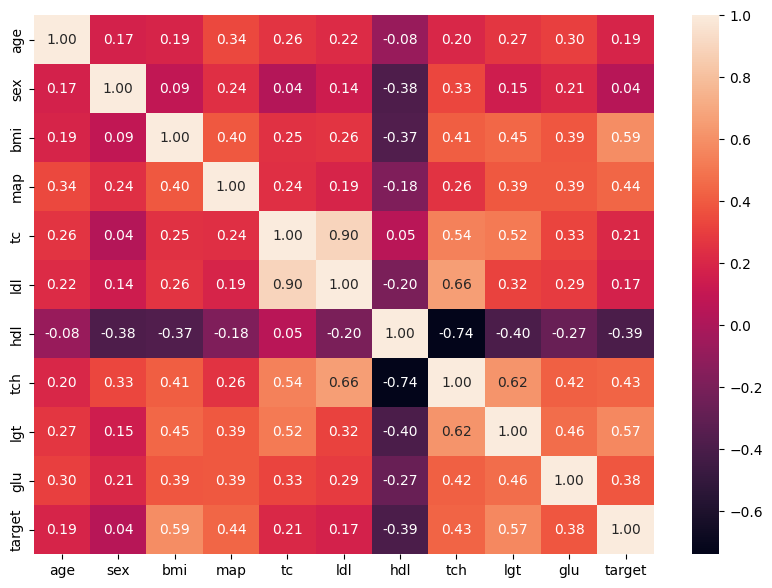

In [5]:
#headmap para vê as correlações 

plt.figure(figsize=(10,7))

#correlation matrix
dataplot = sns.heatmap(dataset.corr(), annot=True, fmt='.2f')

<Figure size 1000x700 with 0 Axes>

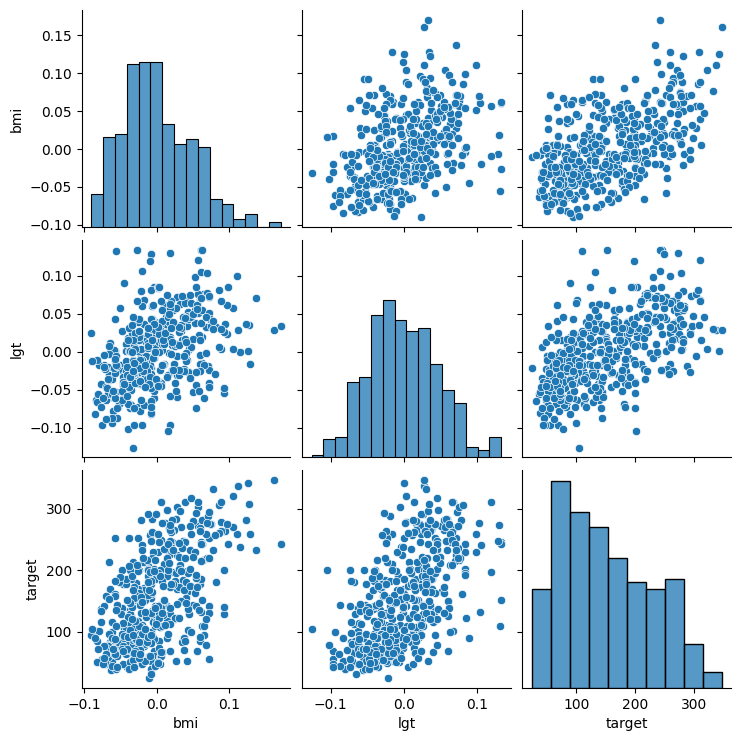

In [6]:
# pairplot

plt.figure(figsize=(10,7))

#plotting graphs
sns.pairplot(dataset[['bmi', 'lgt', 'target']])

In [7]:
#separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:10] # atributos
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) #faz a divisão

#criando os folds para validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=(7)) #faz o particionamento em 10 folds



LR : MSE 3027.40 (616.35) - RMSE  55.02
Ridge : MSE 3550.74 (570.72) - RMSE  59.59
Lasso : MSE 3931.35 (615.45) - RMSE  62.70
KNN : MSE 3494.03 (598.80) - RMSE  59.11
CART : MSE 6209.54 (1067.33) - RMSE  78.80
SVM : MSE 5273.15 (1000.16) - RMSE  72.62


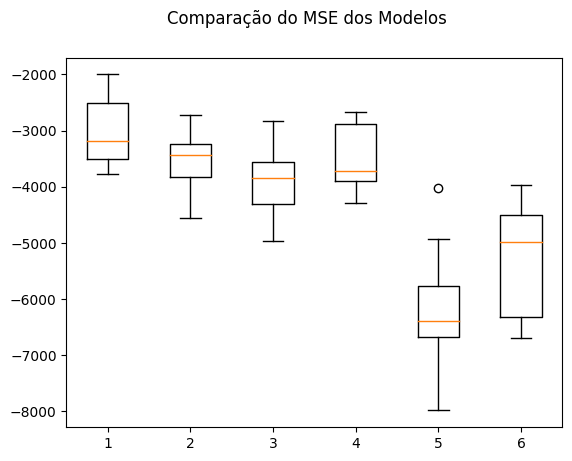

In [12]:
# Modelagem

#Definindo uma seed global para esta célula de código
np.random.seed(7)

# Lista para armazenar os modelos, os resultados e os nomes dos modelos

models =[]
results = []
names = []

    # Preparando os modelos e adicionando-os em uma lista

models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

#Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e MSE dos 10 resultados da validação cruzada
  msg = "%s : MSE %0.2f (%0.2f) - RMSE % 0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)


# Bloxplot de comparaç~]ao dos modelos 

fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


OBS.: MSE - Quanto maior o número, pior o modelo

In [9]:
# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

#Fazendo as pedições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 2966.05
RMSE 54.46
